# 04 - Modelos Gráficos Causales


## Pensando en la Causalidad

¿Alguna vez has notado cómo esos cocineros en los videos de YouTube son excelentes para describir la comida? “Reducir la salsa hasta que alcance una consistencia aterciopelada”. Si recién estás aprendiendo a cocinar, no tienes idea de lo que esto significa. ¡Solo dame el tiempo que debo dejar esto en la estufa! Con la causalidad, es lo mismo. Supon que entras en un bar y escuchas a la gente discutiendo la causalidad (probablemente un bar al lado de un departamento de Economía). En ese caso, los escucharás decir cómo el _confusor_ de los ingresos dificultó identificar el efecto de la inmigración en ese vecindario, por lo que tuvieron que usar una variable instrumental. Y a estas alturas, es posible que no entiendas de qué están hablando. Pero solucionaré al menos parte de este problema ahora mismo. 

Los modelos gráficos son el lenguaje de la causalidad. No son solo lo que usas para hablar con otros aficionados (valientes y verdaderos) a la causalidad, sino también algo que usas para hacer que tus propios pensamientos sean más transparentes. 

Como punto de partida, tomemos la independencia condicional de los posibles resultados como ejemplo. Esta es una de las principales suposiciones que requerimos para que sea cierta al hacer inferencias causales:

$
(Y_0, Y_1) \perp T | X
$

La independencia condicional nos permite medir un efecto en el resultado únicamente debido al tratamiento y no a ninguna otra variable que esté al acecho. El ejemplo clásico de esto es el efecto de un medicamento en un paciente enfermo. Si solo los pacientes muy enfermos reciben el medicamento, incluso podría parecer que administrar el medicamento disminuye la salud de los pacientes. Eso es porque el efecto de la gravedad se está mezclando con el efecto de la droga. Si dividimos a los pacientes en casos graves y no graves y analizamos el impacto del fármaco en cada subgrupo, obtendremos una imagen más clara del efecto real. Este desglose de la población por sus características es lo que llamamos controlar o condicionar sobre X. Al condicionar sobre los casos graves, el mecanismo de tratamiento se vuelve casi aleatorio. Los pacientes dentro del grupo grave pueden o no recibir el fármaco solo por casualidad, ya no por una gravedad alta, ya que todos los pacientes son iguales en esta dimensión. Y si el tratamiento se asigna al azar dentro de los grupos, el tratamiento se vuelve condicionalmente independiente de los posibles resultados. 

La independencia y la independencia condicional son fundamentales para la inferencia causal. Sin embargo, puede ser bastante desafiante entenderlas. Pero esto puede cambiar si usamos el lenguaje correcto para describir este problema. Aquí es donde entran en juego los **modelos gráficos causales**. Un modelo gráfico causal es una forma de representar cómo funciona la causalidad en términos de qué causa qué. 

Un modelo gráfico se ve así

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

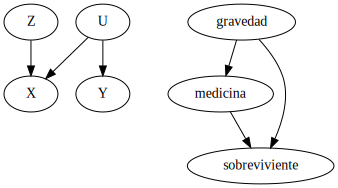

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicina", "sobreviviente")
g.edge("gravedad", "sobreviviente")
g.edge("gravedad", "medicina")

g

Cada nodo es una variable aleatoria. Usamos flechas, o bordes, para mostrar si una variable causa otra. En el modelo gráfico de la izquierda, decimos que `Z` causa `X` y que `U` causa `X` e `Y`. Para dar un ejemplo más concreto, podemos traducir nuestros pensamientos sobre el impacto del medicamento en la supervivencia del paciente en el segundo gráfico anterior. La gravedad afecta tanto la medicina como la supervivencia, y la medicina también provoca la supervivencia. Como veremos, este lenguaje de modelos gráficos causales nos ayudará a aclarar nuestros pensamientos sobre la causalidad, ya que aclara nuestras creencias sobre cómo funciona el mundo. 

## Curso Intensivo en Modelos Gráficos

Hay [semestres enteros sobre modelos gráficos](https://www.coursera.org/specializations/probabilistic-graphical-models). Pero, para nuestro propósito, es (muy) importante que entendamos qué tipo de suposiciones de independencia e independencia condicional implica un modelo gráfico. Como veremos, la independencia fluye a través de un modelo gráfico como el agua fluye a través de un arroyo. Podemos detener este flujo o habilitarlo, dependiendo de cómo tratemos las variables en él. Para entender esto, examinemos algunas estructuras gráficas comunes y ejemplos. Serán bastante sencillos, pero son bloques de construcción suficientes para comprender todo sobre la independencia y la independencia condicional en modelos gráficos.

Primero, mira este gráfico muy simple. `A` causa `B`, `B` causa `C`. O `X` causa `Y` que causa `Z`.

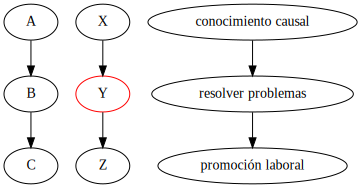

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("conocimiento causal", "resolver problemas")
g.edge("resolver problemas", "promoción laboral")

g

En el primer gráfico, la dependencia fluye en la dirección de las flechas. Observa que la dependencia es simétrica, aunque es un poco menos intuitiva. Para dar un ejemplo más concreto, digamos que saber sobre la inferencia causal (_causal knowledge_ en inglés) es la única forma de resolver los problemas comerciales (_solve problems_), y resolver esos problemas es la única forma de obtener una promoción laboral (_job promotion_). Entonces, el conocimiento causal implica resolver problemas que causan una promoción laboral. Podemos decir aquí que la promoción laboral depende del conocimiento causal. Cuanto mayor sea la experiencia causal, mayores serán sus posibilidades de obtener una promoción. Además, cuanto mayores sean sus posibilidades de promoción, mayores serán sus posibilidades de tener conocimiento causal. De lo contrario, sería difícil conseguir un ascenso. 

Ahora, digamos que condiciono a la variable intermediaria. En este caso, la dependencia está bloqueada. Entonces, `X` y `Z` son independientes dado `Y`. En el gráfico anterior, el rojo indica que Y es una variable condicionada. Del mismo modo, en nuestro ejemplo, si sé que eres bueno resolviendo problemas, saber que conoces la inferencia causal no da más información sobre tus posibilidades de conseguir un ascenso en el trabajo. En términos matemáticos, $E[Promoción|Resolver \ problemas, Conocimiento \ causal]=E[Promoción|Resolver \ problemas]$. La inversa también es cierta, una vez que sé qué tan bueno eres para resolver problemas, conocer tus posibilidades de promoción laboral no me da más información sobre la probabilidad de que conozcas acerca de inferencia causal. 

Como regla general, el flujo de dependencia en el camino directo de `A` a `C` se bloquea cuando condicionamos a una variable intermediaria `B`. O,

$A \not \perp C$

y

$
A \perp C | B
$

Ahora, consideremos una estructura diferente, una **bifurcación**. La misma variable causa otras dos variables en la parte inferior del gráfico. En este caso, la dependencia fluye hacia atrás a través de las flechas y tenemos un **camino de puerta trasera**. Podemos cerrar el camino de la puerta trasera y acabar con la dependencia condicionando la causa común.

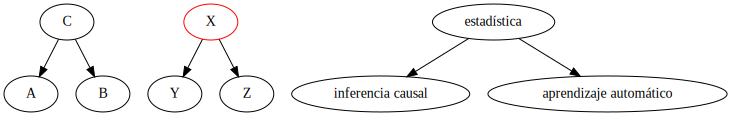

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("estadística", "inferencia causal")
g.edge("estadística", "aprendizaje automático")

g

Por ejemplo, supongamos que tu conocimiento en Estadística hace que sepas más sobre la Inferencia Causal y Aprendizaje Automático (_Machine Learning_). Si no conozco tu nivel de conocimiento estadístico, saber que eres bueno en Inferencia Causal hace que sea más probable que también seas bueno con el Aprendizaje Automático. Eso es porque, incluso si no conozco tu nivel de conocimiento estadístico, puedo inferirlo a partir de tu conocimiento en Inferencia Causal. Si eres bueno en la Inferencia Causal, probablemente seas bueno en Estadística, por lo que es más probable que seas bueno con el Aprendizaje Automático. 

Ahora, si condiciono tu conocimiento sobre Estadística, entonces cuánto sabes sobre el Aprendizaje Automático se vuelve independiente de cuánto sabes sobre Inferencia Causal. Conocer tu nivel de conocimiento en Estadística ya me brinda toda la información que necesito para inferir el nivel de tus habilidades para el Aprendizaje Automático. Es decir, conocer tu nivel de inferencia causal no proporcionará más información en este caso. 

Por regla general, dos variables que comparten una causa común son dependientes, pero independientes cuando condicionamos a la causa común. O

$A \not \perp  B$

y

$
A \perp B | C
$

La única estructura que falta es el **"colisionador"**. Un colisionador es cuando dos flechas chocan en una sola variable. Podemos decir que en este caso, ambas variables comparten un efecto común. 

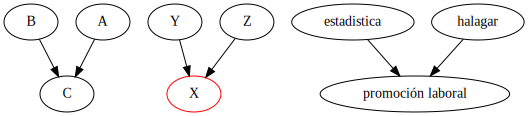

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("estadistica", "promoción laboral")
g.edge("halagar", "promoción laboral")

g

Por ejemplo, imagina que hay dos formas de obtener un ascenso en el trabajo. Puedes ser bueno en Estadística o halagar a tu jefe. Si no condiciono tu promoción laboral, es decir, no sé nada si la obtendrás o no, entonces tu nivel de Estadística y halagos son independientes. En otras palabras, saber qué tan bueno eres en Estadística no me dice nada acerca de qué tan bueno eres halagando a tu jefe. Por otro lado, si obtuviste un ascenso en el trabajo, de repente, conocer tu nivel de Estadística me dice sobre tu nivel de "_halagamiento_". Si eres malo en Estadística y obtuviste un ascenso, es probable que sepas cómo halagar. De lo contrario, no obtendrías un ascenso. Por el contrario, si eres malo halagando, debes ser bueno con la Estadística. Este fenómeno a veces se denomina **explicación** (_explaining away_), porque una causa ya explica el efecto, lo que hace que la otra causa sea menos probable.

Como regla general, el acondicionamiento en un colisionador abre el camino de la dependencia. No condicionarlo lo deja cerrado. O

$A \perp B$

y

$
A \not \perp B | C
$

Conociendo las tres estructuras, podemos derivar una regla aún más general. Una ruta está bloqueada si y solo si:
1. Contiene un no-colisionador que ha sido condicionado
2. Contiene un colisionador que no ha sido condicionado y no tiene descendientes que hayan sido condicionados.

Aquí hay un resumen sobre cómo fluye la dependencia en un gráfico. La he tomado de una [presentación en Stanford](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf) por Mark Paskin. Las flechas con líneas en sus puntas significan independencia, y las flechas sin líneas en sus puntas significan dependencia.

![img](../../causal-inference-for-the-brave-and-true/data/img/graph-flow.png)

Como ejemplo final, trata de averiguar alguna relación de independencia y dependencia en el siguiente gráfico causal.
1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

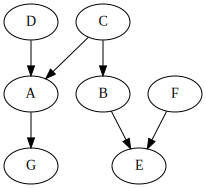

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Answers**:
1. $D \perp C$. Contiene un colisionador que **no** ha sido acondicionado.
2. $D \not\perp C| A $. Contiene un colisionador al que ha sido condicionado.
3. $D \not\perp C| G $. Contiene el descendiente de un colisionador que ha sido condicionado. Puedes ver `G` como una especie de proxy para `A`.
4. $A \perp F $. Contiene un colisionador, `B`->`E`<-`F`, que **no** ha sido condicionado.
5. $A \not\perp F|E $. Contiene un colisionador, `B`->`E`<-`F`, al que ha sido condicionado.
6. $A \perp F|E, C $. Contiene un colisionador, `B`->`E`<-`F`, que ha sido condicionado, pero contiene un no-colisionador que ha sido condicionado. El condicionamiento en `E` abre el camino, pero el condicionamiento en `C` lo vuelve a cerrar.

Conocer los modelos gráficos causales nos permite comprender los problemas que surgen en la inferencia causal. Como hemos visto, el problema siempre se reduce al sesgo. 

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

Los modelos gráficos nos permiten diagnosticar con qué sesgo estamos lidiando y cuáles son las herramientas que necesitamos para corregirlos.

## Sesgo de Confusión

![img](../../causal-inference-for-the-brave-and-true/data/img/causal-graph/both_crap.png)

La primera causa significativa de sesgo es la confusión. Ocurre cuando el tratamiento y el resultado comparten una causa común. Por ejemplo, digamos que el tratamiento es la educación y el resultado son los ingresos. Es difícil saber el efecto causal de la educación sobre los salarios porque ambos comparten una causa común: la inteligencia. Entonces podríamos argumentar que las personas más educadas ganan más dinero simplemente porque son más inteligentes, no porque tengan más educación. Necesitamos cerrar todos los _caminos de puerta trasera_ entre el tratamiento y el resultado para identificar el efecto causal. Si lo hacemos así, el único efecto que nos quedará es el efecto directo `T`->`Y`. En nuestro ejemplo, si controlamos el efecto de la inteligencia, es decir, comparamos personas con el mismo intelecto pero diferentes niveles de educación, la diferencia en el resultado se deberá únicamente a la diferencia en la escolaridad, ya que la inteligencia será la misma para todos. Para corregir el sesgo de confusión, necesitamos controlar todas las causas comunes del tratamiento y el resultado.

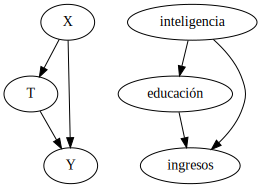

In [6]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("inteligencia", "educación"),
g.edge("inteligencia", "ingresos"),
g.edge("educación", "ingresos")
g

Desafortunadamente, no siempre es posible controlar todas las causas comunes. A veces, hay causas desconocidas o causas conocidas que no podemos medir. El caso de la inteligencia es uno de estos últimos. A pesar de todo el esfuerzo, los científicos aún no han descubierto cómo medir bien la inteligencia. Usaré `U` para denotar variables no medidas aquí. Ahora, supon por un momento que la inteligencia no puede afectar su educación directamente. Afecta qué tan bien te va en las pruebas estandarizadas, pero las pruebas determinan tu nivel de educación ya que abre la posibilidad de una buena universidad. Incluso si no podemos controlar la inteligencia inconmensurable, podemos controlar esos exámenes y cerrar ese camino de puerta trasera.

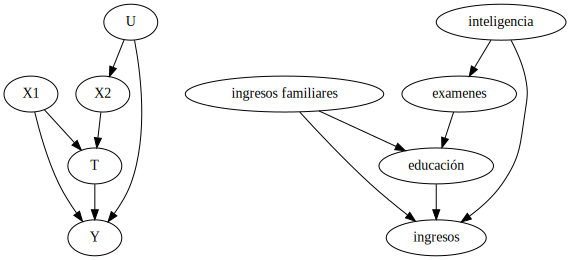

In [7]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("ingresos familiares", "educación")
g.edge("educación", "ingresos")
g.edge("examenes", "educación")
g.edge("ingresos familiares", "ingresos")
g.edge("inteligencia", "examenes")
g.edge("inteligencia", "ingresos")
g

In the following graph, conditioning on X1 and X2, or SAT and family income, is sufficient to close all backdoor paths between the treatment and the outcome. In other words, $(Y_0, Y_1) \perp T | X1, X2$. So even if we can't measure all common causes, we can still attain conditional independence if we control for measurable variables that mediate the effect of the unmeasured on the treatment. One quick note, we also have $(Y_0, Y_1) \perp T | X1, U$, but since we can't observe U, we can't condition on it. 

But what if that is not the case? What if the unmeasured variable causes the treatment and the outcome directly? In the following example, intelligence causes education and income now. So there is confounding in the relationship between the treatment education and the outcome wage. In this case, we can't control the confounder because it is unmeasurable. However, we have other measured variables that can act as a proxy for the confounder. Those variables are not in the backdoor path, but controlling for them will help lower the bias (but it won't eliminate it). Those variables are sometimes referred to as surrogate confounders.

In our example, we can't measure intelligence, but we can measure some of its causes, like the father's and mother's education, and some of its effects, like IQ or SAT score. Controlling for those surrogate variables is not sufficient to eliminate bias, but it helps.

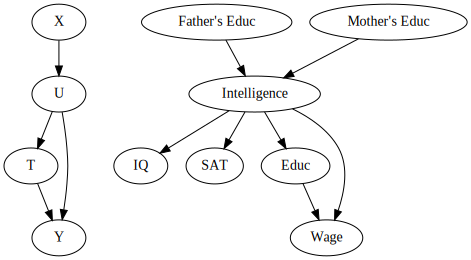

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Selection Bias

You might think it is a good idea to add everything you can measure to your model just to ensure you don't have confounding bias. Well, think again.

![image.png](./data/img/causal-graph/selection_bias.png)

The second significant source of bias is what we will call selection bias. Here, I think the distinction between it and confounding bias is constructive, so I'll stick to it. If confounding bias happens when we don't control for a common cause, selection bias is more related to effects. One word of caution here, economists tend to refer to all sorts of biases as selection bias. 

Often, selection bias arises when we control for more variables than we should. It might be the case that the treatment and the potential outcome are marginally independent but become dependent once we condition on a collider. 

Imagine that with the help of some miracle, you can finally randomize education to measure its effect on wages. But just to be sure you won't have confounding, you control for many variables. Among them, you control for investments. But investment is not a common cause of education and wage. Instead, it is a consequence of both. More educated people both earn more and invest more. Also, those who make more invest more. Since investment is a collider, by conditioning on it, you are opening a second path between the treatment and the outcome, which will make it harder to measure the direct effect. One way to think about this is that by controlling investments, you look at small groups of the population where investment is the same and then find the effect of education on those groups. But by doing so, you are also indirectly and inadvertently not allowing wages to change much. As a result, you won't be able to see how education changes wages because you are not allowing wages to change as they should. 

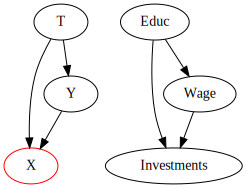

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Imagine that investments and education take only 2 values to demonstrate why this is the case. Whether people invest or not. They are either educated or not. Initially, when we don't control for investments, the bias term is zero: $E[Y_0|T=1] - E[Y_0|T=0] = 0$ because the education was randomised. This means that the wage people would have if they didn't receive education $Wage_0$ is the same if they do or don't receive the education treatment. But what happens if we condition on investments?

Looking at those that invest, we probably have the case that $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. In words, among those that invest, those that manage to do so even without education are more independent of education to achieve high earnings. For this reason, the wage those people have, $Wage_0|T=0$, is probably higher than the wage the educated group would have if they didn't have education, $Wage_0|T=1$. A similar reasoning can be applied to those that don't invest, where we also probably have $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Those who don't invest even with education probably would have a lower wage, had they not got the education, than those who didn't invest but didn't have an education. 

To use a purely graphical argument, if someone invests, knowing that they have high education explains away the second cause, which is wage. Conditioned on investing, higher education is associated with low wages and we have a negative bias $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$. 

As a side note, all of this we've discussed is true if we condition on any descendent of a common effect.

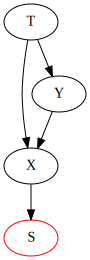

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

A similar thing happens when we condition on a mediator of the treatment. A mediator is a variable between the treatment and the outcome. It, well, mediates the causal effect. For example, suppose again you can randomize education. But, just to be sure, you decide to control whether or not the person had a white-collar job. Once again, this conditioning biasses the causal effect estimation. This time, not because it opens a front door path with a collider, but because it closes one of the channels through which the treatment operates. In our example, getting a white-collar job is one way more education leads to higher pay. By controlling it, we close this channel and leave open only the direct effect of education on wages.

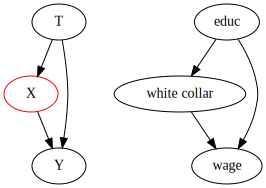

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

To give a potential outcome argument, we know that, due to randomisation, the bias is zero $E[Y_0|T=0] - E[Y_0|T=1] = 0$. However, if we condition on the white-collar individuals, we have that $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$. That is because those who manage to get a white-collar job even without education are probably more hard-working than those who require the help of education to get the same job. With the same reasoning, $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ because those that didn't get a white-collar job even with an education are probably less hard-working than those that didn't, but also didn't have any education. 

In our case, conditioning on the mediator induces a negative bias. It makes the effect of education seem lower than it actually is. This is the case because the causal effect is positive. If the effect were negative, conditioning on a mediator would have a positive bias. In all cases, this sort of conditioning makes the effect look weaker than it is. 

To put it more prosaic way, suppose that you have to choose between two candidates for a job at your company. Both have equally impressive professional achievements, but one does not have a higher education degree. Which one should you choose? Of course, you should go with the one without the higher education because he managed to achieve the same things as the other one but had the odds stacked against him.

![image.png](./data/img/causal-graph/three_bias.png)

## Key Ideas

We've studied graphical models as a language to better understand and express causality ideas. We did a quick summary of the rules of conditional independence on a graph. This helped us then explore three structures that can lead to bias.

The first was confounding, which happens when treatment and outcome have a common cause that we don't account for or control for. The second is selection bias due to conditioning on a common effect. The third structure is also a form of selection bias, this time due to excessive controlling of mediator variables. This excessive controlling could lead to bias even if the treatment was randomly assigned. Selection bias can often be fixed by simply doing nothing, which is why it is dangerous. Since we are biased toward action, we tend to see ideas that control things as clever when they can be doing more harm than good. 

## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).